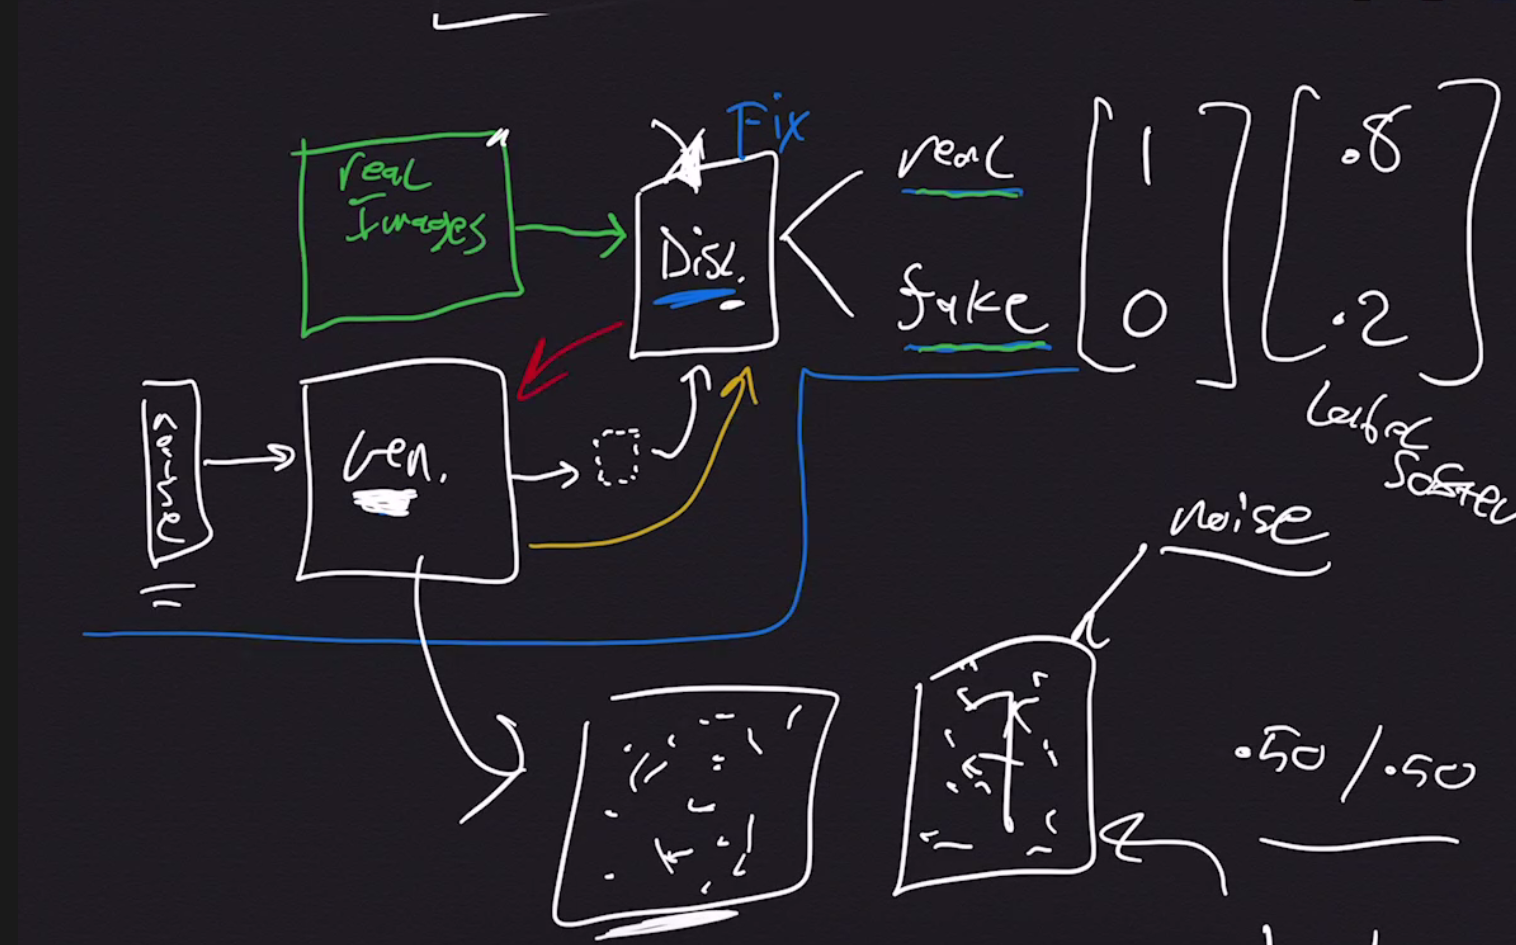

# Intro to Reinforcement Learning

Reinforcement learning requires us to model our problem using the following two constructs:

* An agent, the thing that makes decisions.
* An environment, the world which encodes what decisions can be made, and the impact of those decisions.  

The environment contains all the possible states, knows all the actions that can be taken from each state, and knows when rewards should be given and what the magnitude of those rewards should be. An agent gets this information from the environment by exploring and learns from experience which states provide the best rewards. Rewards slowly percolate outward to neighboring states iteratively, which helps the agent make decisions over longer time horizons.

## The Agent/Environment Interface

![The agent-env interface](images/env-agent.png)

> Image Source: [Reinforcement Learning:An Introduction](http://incompleteideas.net/book/bookdraft2017nov5.pdf)


Reinforcement learning typically takes place over a number of episodes—which are rougly analogous to an epoch. In most situations for RL, there are some "terminal" states within the environment which indicate the end of an episode. In games for example, this happens when the game ends. For example when Mario gets killed or reaches the end of the level. Or in chess when someone is put into checkmate or conceeds. An episode ends when an agent reaches one of these terminal states.

An episode is compirsed of the agent making a series of decisions until it reaches one of these terminal states. Sometimes engineers may choose to terminate an episode after a maximum number of decisions, especially if there is a strong chance that the agent will never reach a terminal state. 

## Markov Decsion Processes

Formally, the problems that reinforcement learning is best at solving are modeled by Markov Decision Processes (MDP).  MDPs are a special kind of graph that are similar to State Machines. MDPs have two kinds of nodes, states and actions. From any given state an agent can select from only the available actions, those actions will take an agent to another state. These transitions from actions to states are frequently stochastic—meaning taking a particular action might lead you to one of several states based on some probabilistic function. 

Transitions from state to state can be associated with a reward but they are not required to be. Many MDPs have terminal states, but those are not formally required either.

![Sample MDP](images/mdp.png)

> Image Source: [Wikimedia commons, public domain](https://commons.wikimedia.org/wiki/File:Markov_Decision_Process_example.png)

This MDP has 3 states (larger green nodes S0, S1, S2), each state has exactly 2 actions available (smaller red nodes, a0, a1), and two transitions have rewards (from S2a1 -> S0 has -1 reward, from S1a0 -> S0 has +5 reward). 

## Finding a Policy

The reinforcment learning algorithm we're going to focus on (Q-Learning) is a "policy based" agent. This means, it's goal is to discover which decision is the "best" decision to make at any given state. Sometimes, this goal is a little naive, for example if the state-spaces is evolving in real time, it may not be possible to determine a "best" policy. In the above MDP, though, there IS an optimal policy... What is it?

### Optimal Policy For the Above:

The only way to gain a positive reward is to take the transition S1a0 -> S0. That gives us +5 70% of the time. 

Getting to S1 requires a risk though: the only way to get to S1 is by taking a1 from S2, which has a 30% chance of landing us back at S0 with a -1 reward. 

We can easily oscilate infinitely between S0 and S2 with zero reward by taking only S0a1, S0a0, and S2a0 repeatedly. So the question is: is the risk worth the reward? 

Say we're in S1, we can get +5 70% of the time by taking a0. That's an expected value of 3.5 if our policy is always take action a0. If we're in S2, then, we can get an expected value of 3.5 30% of the time, and a -1 30% of the time by always taking action a1: 

`(.3 * 3.5) + (.3 * -1) = 1.05 - .3 = .75`

So intiutively we should go ahead and take the risky action to gain the net-positive reward. **But wait!** Both of our actions are *self-referential* and might lead us back to the original state... how do we account for that? 

For the mathematical purists, we can use something called the Bellman Optimality Equation. Intuitively, the Bellman optimality equation expresses the fact that the value of a state under an optimal policy must equal the expected return for the best action from that state:

For the value of states:

![optimial state value](images/v-bellman.png)

For the state-action pairs:

![optimal-state-action values](images/q-bellman.png)

> For a more complete treatment of these equations, see [Chapter 3.6 of this book](http://incompleteideas.net/book/bookdraft2017nov5.pdf)

Several bits of notation were just introduced:

* The Discount Factor (γ) — some value between 0 and 1, which is required for convergance.
* The expected return (Gt) — the value we want to optimize.
* The table of state-action pairs (Q) — these are the values of being in a state and taking a given action.
* The table of state values (V*) — these are based on the Q-values from the Q-table based on taking the best action.
* The policy is represented by π — our policy is what our agent thinks is the best action
* S and S' both represent states, the current state (S) and the next state (S') for any given state-action pair.
* r represents a reward for a given transition.

Solving this series of equations is computationally unrealistic for most problems of any real size. It is an iterative process that will only converge if the discount factor λ is between 0 and 1, and even then often it converges slowly. The most common algorithm for solving the Bellman equations directly is called Value Iteration, and it is much like what we did above, but we'd apply that logic repeatedly, for every state-action pair, and we'd have to apply a discount factor to the expected values we computed.

Value iteration is never used in practice. Instead we use Q-learning to experimentally explore states, essentially we attempt to partially solve the above Bellman equations. For a more complete treatment of value iteration, see the book linked above. 


In my opinion, it is much easier, and much more helpful to see Q-Learning in action than it is to pour over the dense and confusing mathematical notation above. Q-Learning is actually wonderfully intuitive when you take a step back from the math.  